[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1rxkuydyd_wNdiuKh22-e6mr-zlsRVC1N/view?usp=sharing)



# Section 47: Convolutional Neural Networks

- online-ds-ft-100719
- 02/14/20


# STUDY GROUP RESOURCES



- [NOTEBOOK: This Notebook on Google Colab](https://drive.google.com/file/d/1rxkuydyd_wNdiuKh22-e6mr-zlsRVC1N/view?usp=sharing)
- [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- [POWERPOINT: of Human Visual System](https://github.com/jirvingphd/fsds_100719_cohort_notes/blob/master/bio_neural_networks.pptx)
- [VIDEO: Study Group Video Recording)](https://youtu.be/mPazOFdlYfA)

- [INTERACTIVE VISUAL: CNN layers](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)




## LEARNING OBJECTIVES

- Learn about the retina /human visual system
- Relate human to CNNS
- Discuss using colab/colab pro 
- Fitting, evaluating, saving CNNs
- Transfer Learning & Pre-trained Networks 

## Overview - CNNs



CNNs have certain features that identify patterns in images because of  "convolution operation" including:

- Dense layers learn global patterns in their input feature space

- Convolution layers learn local patterns, and this leads to the following interesting features:
    - Unlike dense networks, local patterns recognized can be recognized _anywhere_ in the images. 
    - Deeper convolutional neural networks can learn spatial hierarchies.
        - A first layer will learn small local patterns, a second layer will learn larger patterns using features of the first layer patterns, etc. 
    
- Because of these properties, CNNs are great for tasks like:
    - Image classification
    - Object detection in images
    - Picture neural style transfer

## How Convolution works:

 <img src ="https://raw.githubusercontent.com/jirvingphd/dsc-04-43-02-convolutional-neural-networks-online-ds-ft-021119/master/architecture-cnn.png">
 
 - **The Convolution Operation:**
    - Detect complex biilding blocks or features that can aid in a larger task. 
        - i.e. detecting vertical or horizontal edges (example below)<br>
        <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-43-02-convolutional-neural-networks-online-ds-ft-021119/master/conv.png" width=200><br>
        - Here, the 3 x 3 matrix on the right represents the _filter_  used to perform a convolution operation to detect horizntal edges.
        - The 5x5 image on the left  would by intensity values between 1-255(or rescaled to 1-10)
    - **In Keras this is perfomed by a `Conv2d` layer.**
        - Applies the convolution filter to every possible 3x3 region posible (for above example) <br>
 <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-43-02-convolutional-neural-networks-online-ds-ft-021119/master/convolution-layer-a.png" width=400>

### **Padding:**
- Some issues arise using filteres on images.
    - Image shrinks with each convolution layer.
        - Examples:
            - Start with a 5x5 image and use a 3x3 convolution matrix, result is 3x3 image. 
            - Start with a 10x10 image and use a 3x3 conv matrix, result is 8x8 image. 
    - The pixels around the edges are used much less in the outputs due to the filter. 
- Padding solves these issues 
    - Adding one layer of pixels around the edges preserves the image size with a 3x3 filter. 
    - Example: padding our 5x5 image (so it becomes a 6x6 image), we can now use a 3x3 conv filter and the resulting image is stil 5x5.
- Padding terminology:
    - 'Valid' - no padding.
    - 'Same' - padding such that the output is the same size. 

- **Strided convolutions**
    - Stride = how the filter moves over the image. 
        - Increasing stride so that it moves 2 pixels over instead of 1 results in a smaller # of locations.
        - Rarely used in practice, but important option for some models. 
 
### Convolutions with color images: 
- Let's assume a 7x7 RGB, which becomes a 7 x 7 x 3 tensor. 
    - Will need to use a filter that has the third dimension as 3. 
    - Can use to detect features on individual color channels.
- Can deconvolve with several 3D filters, then stack the output results together. 

- **Advantage: your image can be huge and the amount of parameters only depends on how many _filters_ used.**
    - Lets say we have 20 3x3x3(color) images 
        - Would have $20 * 27 + a_bias_for_each_filter (1*20) = 560$ parameters

- **Notation:**

    - $f^{[l]}$ = size of the filter
    - $p^{[l]}$ = padding
    - $s^{[l]}$ = amount of stride
    - $ n_c^{[l]}$ = number of filters
    - filter: $f^{[l]}$ x $f^{[l]}$ x $ n_c^{[l-1]}$


- Input =  $n_h^{[l-1]} * n_w^{[l-1]} * n_c^{[l-1]}$
- Output = $n_h^{[l]} * n_w^{[l]} * n_c^{[l]}$

- Height and width are given by:

    - $n_h^{[l]}= \Bigr\lfloor\dfrac{n_h^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1\Bigr\rfloor$

    - $n_w^{[l]}= \Bigr\lfloor\dfrac{n_w^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1\Bigr\rfloor$


- Activations: $a^{[l]}$ is of dimension $ n_h^{[l]} * n_w^{[l]} * n_c^{[l]} $

## Pooling Layers
- After Conv layers, intended to significantly downsample the previous convolution layer.
    - After conv layers detect edges/patterns, poooling layers will take a summary of the convoltuions from a larger section.
    - Most common pooling layer is MaxPooling
        - Takes the maximum of all convolutions from a larger area of the iamge. 
        - Works better than average pooling.
- Downsampling is essential for viable executin times. 

- **MaxPooling Hyperparameters:**
    - Parameter names:
        - filter_size (f)
        - stride (S)
    - Common combinations:
        - f=2, s=2
        - f=3, s=2
        

# Loading in the data




## FIRST LOAD ENTIRE ZIP FILE INTO COLAB, DONT RUN FROM GDRIVE

- [Google Drive Link to zip file](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- https://medium.com/datadriveninvestor/speed-up-your-image-training-on-google-colab-dc95ea1491cf)

```python
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
# %cd /gdrive
%cd ~
%cd ..


import os,glob
print(os.path.abspath(os.curdir))

source_folder = r'/gdrive/My Drive/Datasets/'
target_folder = r'/content/'
file = glob.glob(source_folder+'*.zip',recursive=True)
file=file[0]
```

```python
## Unzip data
zip_path = file

!cp "{zip_path}" .

!unzip -q dogs-vs-cats-sorted.zip
!rm dogs-vs-cats-sorted.zip
```

```python
# ## DOG VS CAT
base_folder = r'dogs-vs-cats-sorted/'

train_base_dir = base_folder+'training_set/
test_base_dir =base_folder+'test_set/' 

train_dogs = train_base_dir+'dogs/'
train_cats = train_base_dir+'cats/'

test_dogs = test_base_dir+'dogs/'
test_cats = test_base_dir+'cats/'
```

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
# %cd /gdrive/My\ Drive
%cd ~
%cd ..

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/root
/


In [0]:
import os,glob
os.path.abspath(os.curdir)
os.listdir()

['tmp',
 'proc',
 'lib64',
 'usr',
 'var',
 'srv',
 'lib',
 'etc',
 'opt',
 'root',
 'boot',
 'home',
 'media',
 'mnt',
 'sbin',
 'bin',
 'dev',
 'run',
 'sys',
 'gdrive',
 '.dockerenv',
 'tools',
 'datalab',
 'swift',
 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl',
 'content',
 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl',
 'tensorflow-2.1.0',
 'lib32']

In [0]:
print(os.path.abspath(os.curdir))

source_folder = r'/gdrive/My Drive/Datasets/'
# target_folder = r'/content/'
# os.listdir(source_folder), os.listdir(target_folder)
file = glob.glob(source_folder+'*.zip',recursive=True)[0]
file

/


'/gdrive/My Drive/Datasets/dogs-vs-cats-sorted.zip'

In [0]:
# os.listdir('..')

In [0]:
zip_path = file

!cp "{zip_path}" .

!unzip -q dogs-vs-cats-sorted.zip
!rm dogs-vs-cats-sorted.zip

In [0]:
import os,glob
print(os.path.abspath(os.curdir))
os.listdir()
# os.chdir('My Drive/')

/


['tmp',
 'proc',
 'lib64',
 'usr',
 'var',
 'srv',
 'lib',
 'etc',
 'opt',
 'root',
 'boot',
 'home',
 'media',
 'mnt',
 'sbin',
 'bin',
 'dev',
 'run',
 'sys',
 'dogs-vs-cats-sorted',
 '__MACOSX',
 'gdrive',
 '.dockerenv',
 'tools',
 'datalab',
 'swift',
 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl',
 'content',
 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl',
 'tensorflow-2.1.0',
 'lib32']

# Functions from Class

In [0]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_keras_history(history,figsize=(10,4),subplot_kws={}):
    if hasattr(history,'history'):
        history=history.history
    figsize=(10,4)
    subplot_kws={}

    acc_keys = list(filter(lambda x: 'acc' in x,history.keys()))
    loss_keys = list(filter(lambda x: 'loss' in x,history.keys()))

    fig,axes=plt.subplots(ncols=2,figsize=figsize,**subplot_kws)
    axes = axes.flatten()

    y_labels= ['Accuracy','Loss']
    for a, metric in enumerate([acc_keys,loss_keys]):
        for i in range(len(metric)):
            ax = pd.Series(history[metric[i]],
                        name=metric[i]).plot(ax=axes[a],label=metric[i])
    [ax.legend() for ax in axes]
    [ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) for ax in axes]
    [ax.set(xlabel='Epochs') for ax in axes]
    plt.suptitle('Model Training Results',y=1.01)
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig


    
def evaluate_model(y_true, y_pred,history=None):
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
        
    if history is not None:
        plot_keras_history(history)
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)

    print(metrics.classification_report(y_true,y_pred))
    
    fig = plot_confusion_matrix((y_true,y_pred))
    plt.show()
    
    
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')
    
    
from sklearn.metrics import make_scorer
def my_custom_scorer(y_true,y_pred,verbose=True):#,scoring='accuracy',verbose=True):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""

    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix
    import numpy as np

    ## reduce dimensions of y_train and y_test
    if y_true.ndim>1:            
        y_true = y_true.argmax(axis=1)

    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)
        
    evaluate_model(y_true,y_pred)
    print('\n\n')
    return metrics.accuracy_score(y_true,y_pred)



def get_secret_password(file='/Users/jamesirving/.secret/gmail.json'):
    with open(file) as file:
        import json
        gmail = json.loads(file.read())
    # email_notification()
    print(gmail.keys())
    return gmail


def email_notification(password_obj=None,subject='GridSearch Finished',
                       msg='The GridSearch is now complete.'):
    """Sends email notification from gmail account using previously encrypyted password  object (an instance
    of EncrypytedPassword). 
    Args:
        password_obj (dict): Login info dict with keys: username,password.
        subject (str):Text for subject line.
        msg (str): Text for body of email. 

    Returns:
        Prints `Email sent!` if email successful. 
    """
    if password_obj is None:
        gmail = get_secret_password()
    else:
        assert ('username' in password_obj)&('password' in password_obj)
        gmail = password_obj
        
    if isinstance(msg,str)==False:
        msg=str(msg)
        
    
    # import required packages
    import smtplib
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email.mime.image import MIMEImage
    from email import encoders
    

    ## WRITE EMAIL
    message = MIMEMultipart()
    message['Subject'] =subject
    message['To'] = gmail['username']
    message['From'] = gmail['username']
    message.attach(MIMEText(msg,'plain'))
    text_message = message.as_string()


    # Send email request
    try:
        with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
            
            server.login(gmail['username'],gmail['password'])
            server.sendmail(gmail['username'],gmail['username'], text_message)#text_message)
            server.close()
            print(f"Email sent to {gmail['username']}!")
        
    except Exception as e:
        print(e)
        print('Something went wrong')
       
       
       
def prepare_gridsearch_report(grid_search,X_test,y_test,
                              save_path = 'results/emails/'):
    """Creates a text report with grid search results 
    and saves it to disk. Text is returned and can be attached as 
    the `msg` param for email_notification'"""
    ## Make folders for saving email contents
    import os,sys
    import sklearn.metrics as metrics
    os.makedirs(save_path,exist_ok=True)
    
    ## Get time afor report
    import datetime as dt
    import tzlocal as tz
    now = dt.datetime.now(tz.get_localzone())
                  
    time = now.strftime("%m/%d/%Y - %I:%M %p")  
    
    ## filepaths for fig and report
    fig_fpath = save_path+'confusion_matrix.png'
    msg_text_path = save_path+'msg.txt'

    
    ## GET BEST PARAMS AND MODEL
    best_params = str(grid_search.best_params_)
    best_model = grid_search.best_estimator_#(grid.best_params_)
    
    # Get predictions
    y_hat_test = best_model.predict(X_test)
    
    ## Get Classification report
    report = metrics.classification_report(y_test.argmax(axis=1),y_hat_test)
    
    ## Get text confusion matrix
    cm = np.round(metrics.confusion_matrix(y_test.argmax(axis=1),y_hat_test,normalize='true'),2)
    cm_str = str(cm)

          
    ## Combine text for report
    msg_text = [f'Grid Search Results from {time}:\n']
    msg_text = ['The best params were:\n\t']
    msg_text.append(best_params)
    msg_text.append('\n\n')
    msg_text.append('Classification Report:\n')
    msg_text.append(report)
    msg_text.append('\n\n')

    msg_text.append('Confusion Matrix (normalized to true labels):\n')
    msg_text.append(cm_str)
                  

    
    ## Save the text to file
    with open(msg_text_path,'w+') as f:
        f.writelines(msg_text)
    print(f"Message saved as {msg_text_path}")
                  
    ## Load the (fixed) text from file
    with open(msg_text_path,'r') as f:
        txt = f.read()
        
    ## Plot and save confusion matrix
    fig = plot_confusion_matrix((y_test,y_hat_test))
    try:
        fig.savefig(fig_fpath, dpi=300, facecolor='w', edgecolor='w', orientation='portrait',
                    papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
        print(f"Figure saved as {fig_fpath}")           
    except Exception as e:
        print(f"[!] ERROR saving figure:\n\t{e}")
        
    return txt#,fig

## Using Colab Pro 

In [0]:
#https://colab.research.google.com/notebooks/pro.ipynb
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Feb 15 21:56:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


## Installs & Imports

In [0]:
!pip install pillow
!pip install opencv-contrib-python
!pip install -U fsds_100719


from fsds_100719.imports import *


fsds_1007219  v0.7.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [0]:
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import cv2


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
# ## dataset
base_folder = r'dogs-vs-cats-sorted/'#My Drive/Datasets/dogs-vs-cats-sorted/'
os.listdir(base_folder)

['test_set', 'training_set', 'single_prediction', '.DS_Store']

In [0]:
# ## DOG VS CAT
base_folder = r'dogs-vs-cats-sorted/'

train_base_dir = base_folder+'training_set/'
test_base_dir =base_folder+'test_set/' 

train_dogs = train_base_dir+'dogs/'
train_cats = train_base_dir+'cats/'

test_dogs = test_base_dir+'dogs/'
test_cats = test_base_dir+'cats/'

## Image manipulation with opencv

In [0]:
import cv2,glob,os
dog_filenames = glob.glob(train_dogs+'*.jpg')
cat_filenames = glob.glob(train_cats+'*.jpg')
img_filenames = [*dog_filenames,*cat_filenames]

dog_testnames = glob.glob(test_dogs+'*.jpg')
cat_testnames = glob.glob(test_cats+'*.jpg')

print(len(img_filenames))
img_filenames[:10]

8000


['dogs-vs-cats-sorted/training_set/dogs/dog.1106.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.2445.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.863.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.3576.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.277.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.1698.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.470.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.1127.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.2132.jpg',
 'dogs-vs-cats-sorted/training_set/dogs/dog.1516.jpg']

In [0]:
def load_image_cv2(filename, RGB=True):
    """Loads image using cv2 and converts to either matplotlib-RGB (default)
    or grayscale."""
    import cv2

    IMG = cv2.imread(filename)
    if RGB: cmap = cv2.COLOR_BGR2RGB
    else: cmap=cv2.COLOR_BGR2GRAY
    return cv2.cvtColor(IMG,cmap)

(421, 421)


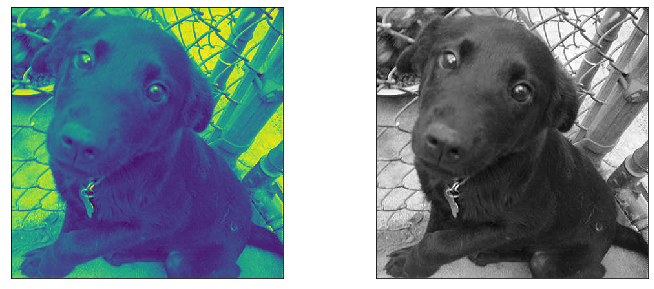

In [0]:
## Load in and display image.
IMG = load_image_cv2(img_filenames[0],RGB=False)

## Even if you import as grayscale, must tell plt to use gray cmap
fig,ax= plt.subplots(ncols=2,figsize=(12,5))
ax[0].imshow(IMG)
ax[1].imshow(IMG,cmap='gray')

## Remove axes labels https://stackoverflow.com/a/2176591
[(a.get_xaxis().set_visible(False), a.get_yaxis().set_visible(False)) for a in ax]
print(IMG.shape)

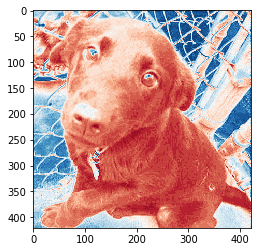

In [0]:
## Using seaborn color palette with imshow
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('RdBu',n_colors=25))
plt.imshow(IMG,cmap=cmap)

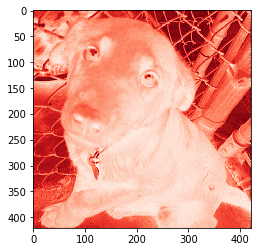

In [0]:
plt.imshow(IMG,cmap='Reds')

(421, 421)


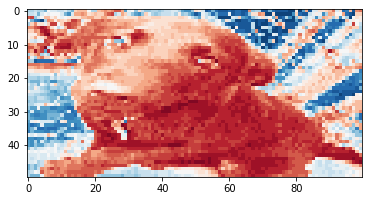

In [0]:
## RESIZING IMAGES
print(IMG.shape)
small = cv2.resize(IMG,(100,50))
plt.imshow(small,cmap=cmap)

(210, 210)


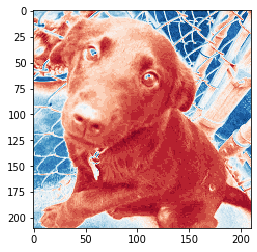

In [0]:
## Resizing Using Ratios 
w_ratio = 0.5
h_ratio = 0.5

## Must Pass cv2.resize(IMG, (0,0) IMG, w_ratio,h_ratio)
new_img = cv2.resize(IMG, (0,0), IMG, w_ratio,h_ratio)
plt.imshow(new_img,cmap=cmap)
print(new_img.shape)

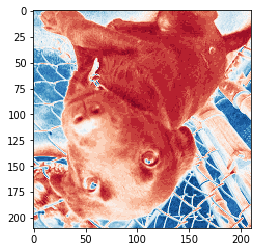

In [0]:
new_img = cv2.flip(new_img,0)
plt.imshow(new_img,cmap=cmap)

In [0]:
*a,_=test_base_dir.split('/')
save_dir = '/'.join(a)
save_dir

'dogs-vs-cats-sorted/test_set'

In [0]:
cv2.imwrite(save_dir+'example_save.jpg',new_img)

True

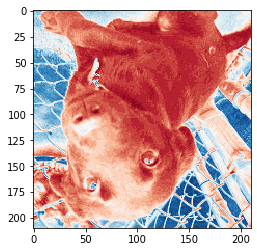

In [0]:
plt.imshow(cv2.imread(save_dir+'example_save.jpg',cv2.COLOR_BGR2RGB),cmap=cmap)
plt.gcf().patch.set_visible(False)

In [0]:
print(base_folder)
os.listdir(base_folder)

dogs-vs-cats-sorted/


['test_set',
 'training_set',
 'test_setexample_save.jpg',
 'single_prediction',
 '.DS_Store']

# Using CNNs

## Preparing Images Using .flow instead of flow_from_directory
- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [0]:
from PIL import Image
from keras.preprocessing import image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm

# defining a function to read images
def read_img(img_path,target_size=(150, 150, 3)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)

    return img

# reading the images
train_img = []
train_label = []

# dog=1
for img_path in tqdm(dog_filenames):
    train_img.append(read_img(img_path))
    train_label.append(1)

for img_path in tqdm(cat_filenames):
    train_img.append(read_img(img_path))
    train_label.append(0)

print('\n',pd.Series(train_label).value_counts())


# reading the images
dog_testnames = glob.glob(test_dogs+'*.jpg')
cat_testnames = glob.glob(test_cats+'*.jpg')

test_img = []
test_label = []

for img_path in tqdm(dog_testnames):
    test_img.append(read_img(img_path))
    test_label.append(1)

for img_path in tqdm(cat_testnames):
    test_img.append(read_img(img_path))
    test_label.append(0)

print('\n',pd.Series(test_label).value_counts())

  4%|▍         | 44/1000 [00:00<00:02, 437.45it/s]


 1    4000
0    4000
dtype: int64


100%|██████████| 1000/1000 [00:02<00:00, 410.98it/s]


 1    1000
0    1000
dtype: int64


In [0]:
from sklearn.model_selection import train_test_split
X = np.array(train_img, np.float32)
y = np.array(train_label)
X_test = np.array(test_img, np.float32)
y_test = np.array(test_label)

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)

In [0]:
def train_test_val_datagens(BATCH_SIZE = 32):
    ## Create training and test data
    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

    test_datagen = ImageDataGenerator(rescale = 1./255)
    val_datagen = ImageDataGenerator(rescale = 1./255)

    training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
    test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
    val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

    return training_set,test_set,val_set
    
training_set,test_set,val_set = train_test_val_datagens(BATCH_SIZE=32)    
    # help(train_datagen.flow)
# training_set = train_datagen.flow_from_directory(base_folder+'training_set/',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

# test_set = test_datagen.flow_from_directory(base_folder+'test_set/',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')
shapes = ["Batchsize", "img_width","img_height","img_dim"]
SHAPES = dict(zip(shapes, training_set[0][0].shape))
print(SHAPES)
print(training_set[0][0].shape)
print('\nLabels for batch')
print(training_set[0][1])


{'Batchsize': 32, 'img_width': 150, 'img_height': 150, 'img_dim': 3}
(32, 150, 150, 3)

Labels for batch
[1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0]


In [0]:
training_set[0][1]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [0]:
print(SHAPES)

{'Batchsize': 32, 'img_width': 150, 'img_height': 150, 'img_dim': 3}


In [0]:
# Part 1 - Building the CNN
clock = fs.jmi.Clock()
clock.tic('')
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(SHAPES['Batchsize'], (3, 3),
                             input_shape = (SHAPES['img_width'],
                                            SHAPES['img_height'],
                                            SHAPES['img_dim']),
                             activation = 'relu'))

classifier.add(Conv2D(SHAPES['Batchsize'], (3, 3),
                      input_shape = (SHAPES['img_width'], 
                                     SHAPES['img_height'],
                                     SHAPES['img_dim']),
                       activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(SHAPES['Batchsize'], (3, 3),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = SHAPES['Batchsize'], activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
display(classifier.summary())
# Part 2 - Fitting the CNN to the images

classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 250,workers=-1)

clock.toc('')

--- CLOCK STARTED @:    02/15/20 - 09:57:22 PM           Label:            --- 






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatte

None




Epoch 1/2





1000/1000 [==============================] - 169s 169ms/step - loss: 0.6957 - acc: 0.4923 - val_loss: 0.6932 - val_acc: 0.4996
Epoch 2/2
1000/1000 [==============================] - 154s 154ms/step - loss: 0.6932 - acc: 0.4952 - val_loss: 0.6931 - val_acc: 0.5004
--- TOTAL DURATION   =  5 min, 23.345 sec --- 


Lap #,Start Time,Duration,Label
TOTAL,02/15/20 - 09:57:22 PM,"5 min, 23.345 sec",


## Getting Predictions for a Single Image?

cat


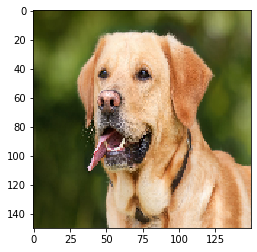

In [0]:
import numpy as np
from keras.preprocessing import image
test_image_ = image.load_img(base_folder+'single_prediction/cat_or_dog_1.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image_)

## Must expand to get a pred for only 1
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

# training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)
plt.imshow(test_image_,cmap='gray')

In [0]:
# y_hat_test = classifier.predict_classes(X_test).flatten()
# pd.Series(y_hat_test).value_counts()


## Evaluate Model

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Length: 800, dtype: int32


------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       401
           1       0.00      0.00      0.00       399

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



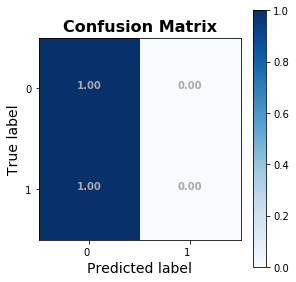

In [0]:
y_hat_val = classifier.predict_classes(X_val).flatten()
print(pd.Series(y_hat_val))
evaluate_model(y_val,y_hat_val)

In [0]:
# Part 1 - Building the CNN
clock = fs.jmi.Clock()
clock.tic('')
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(SHAPES['Batchsize'], (3, 3),
                             input_shape = (SHAPES['img_width'],
                                            SHAPES['img_height'],
                                            SHAPES['img_dim']),
                             activation = 'relu'))

classifier.add(Conv2D(SHAPES['Batchsize'], (3, 3),
                      input_shape = (SHAPES['img_width'], 
                                     SHAPES['img_height'],
                                     SHAPES['img_dim']),
                       activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(SHAPES['Batchsize'], (3, 3),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = SHAPES['Batchsize'], activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
display(classifier.summary())
# Part 2 - Fitting the CNN to the images

classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 250,workers=-1)

clock.toc('')

--- CLOCK STARTED @:    02/15/20 - 10:02:46 PM           Label:            --- 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 32)        9248      
________________________________________________________

None

Epoch 1/2
1000/1000 [==============================] - 156s 156ms/step - loss: 0.6786 - acc: 0.5667 - val_loss: 0.6351 - val_acc: 0.6626
Epoch 2/2
1000/1000 [==============================] - 155s 155ms/step - loss: 0.5872 - acc: 0.6850 - val_loss: 0.5182 - val_acc: 0.7400
--- TOTAL DURATION   =  5 min, 11.280 sec --- 


Lap #,Start Time,Duration,Label
TOTAL,02/15/20 - 10:02:46 PM,"5 min, 11.280 sec",


## Make functions

In [0]:
def build_model(SHAPES,filter_size=(3,3), pool_size=(2,2),dropout=True): 
    vars_ = locals()
    print(f'[i] MODEL BUILT USING:\n\t{vars_}')
    # Part 1 - Building the CNN

    # Importing the Keras libraries and packages
    from keras.models import Sequential
    from keras.layers import Conv2D
    from keras.layers import MaxPooling2D
    from keras.layers import Flatten
    from keras.layers import Dense

    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Conv2D(SHAPES['Batchsize'], filter_size,
                                input_shape = (SHAPES['img_width'], SHAPES['img_height'], SHAPES['img_dim']),
                                activation = 'relu'))

    classifier.add(Conv2D(SHAPES['Batchsize'], filter_size,
                        input_shape = (SHAPES['img_width'], SHAPES['img_height'], SHAPES['img_dim']), activation = 'relu'))

    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = pool_size))
    if dropout:
        classifier.add(Dropout(0.2))

    # Adding a second convolutional layer
    classifier.add(Conv2D(SHAPES['Batchsize'], filter_size, activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = pool_size))

    # Step 3 - Flattening
    classifier.add(Flatten())

    # Step 4 - Full connection
    classifier.add(Dense(units = SHAPES['Batchsize'], activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    # Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                       metrics = ['accuracy'])
    display(classifier.summary())
    return classifier
    # Part 2 - Fitting the CNN to the images



def train_model(classifier,training_set, test_set, 
                params=dict(steps_per_epoch = 2000,
                            epochs = 3, validation_steps = 500,
                            workers=-1)):
    vars = locals()
    print(f'[i] Training model using\n\t{vars}\n')
    clock = Timer()
    
    history_ = classifier.fit_generator(training_set,
                                        validation_data = test_set,
                                        validation_steps=validation_steps,
                                        **params)
                        # workers=workers)

    clock.stop()
    return history_

model_=build_model(SHAPES)
history = train_model(model_,training_set,test_set)
y_hat_val = model_.predict_classes(X_val).flatten()
evaluate_model(y_val,y_hat_val,history=history)

[i] MODEL BUILT USING:
	{'dropout': True, 'pool_size': (2, 2), 'filter_size': (3, 3), 'SHAPES': {'Batchsize': 32, 'img_width': 150, 'img_height': 150, 'img_dim': 3}}
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (Max

None

[i] Training model using
	{'params': {'steps_per_epoch': 2000, 'epochs': 3, 'validation_steps': 500, 'workers': -1}, 'test_set': <keras_preprocessing.image.numpy_array_iterator.NumpyArrayIterator object at 0x7f7e139e2240>, 'training_set': <keras_preprocessing.image.numpy_array_iterator.NumpyArrayIterator object at 0x7f7e139e23c8>, 'classifier': <keras.engine.sequential.Sequential object at 0x7f7c9407c198>}

[i] Timer started at 02/15/20 - 22:07:58


NameError: ignored

## Saving and Loading Models/Weights

In [0]:
## To save to Gdrive, must first chdir to My Drive (so there's no spaces in fpath)
curdir = os.path.abspath(os.curdir)

gdrive_folder =r'/gdrive/My Drive/'
model_subfolder = 'Datasets/Models/cat_vs_dog/'

try:
    os.chdir(gdrive_folder)
    os.makedirs(model_subfolder,exist_ok=True)
except Exception as e:
    print(f'ERROR: {e}')
os.listdir(model_subfolder)

In [0]:
def save_model(model,model_subfolder = 'Datasets/Models/cat_vs_dog/',
               base_modelname = 'CNN_cat_dog_02142020', as_json=True,
               return_fpaths=True,verbose=True):
    # https://jovianlin.io/saving-loading-keras-models/
    try:
        weight_fpath = model_subfolder+base_modelname+'_weights.h5'
        model.save_weights(weight_fpath, overwrite=True)

        if as_json:
            model_fpath = model_subfolder+base_modelname+'_model.json'
            # Save the model architecture
            with open(model_fpath, 'w') as f:
                f.write(model.to_json())
        else:
            model_fpath = model_subfolder+base_modelname+'_model.h5'
            model.save(model_fpath)
        if verbose: 
            print(f"[io] Model architecture saved as {model_fpath}")
            print(f"[io] Model weights saved as {weight_fpath}")
        else:
            print(f"[io] Successfully saved model.")

    except Exception as e:
        import warnings
        warnings.warn(f"ERROR SAVING: {e}")
    if return_fpaths:
        return model_fpath, weight_fpath

model_fpath,weight_fpath = save_model(model)

In [0]:
def load_model(model_fpath,weight_fpath=None,as_json=True):
    from keras.models import model_from_json
    if (as_json == True) & (weight_fpath is None):
        raise Exception('If using as_json=True, must provide ')

    # Model reconstruction from JSON file
    with open(model_fpath, 'r',encoding="utf8") as f:
        model2 = model_from_json(f.read())

    # Load weights into the new model
    model2.load_weights(weight_fpath)
    display(model2.summary())
    return model2
model_loaded = load_model(model_fpath,weight_fpath)

In [0]:
y_hat_val = model_loaded.predict_classes(X_val)
evaluate_model(y_val,y_hat_val)

## Transfer Learning

https://www.kaggle.com/risingdeveloper/transfer-learning-in-keras-on-dogs-vs-cats

In [0]:
from keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))#256
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes
# model.summary()


In [0]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [0]:
len(training_set)*32

In [0]:
history = model.fit_generator(training_set,
                              steps_per_epoch = 2000,
                              epochs = 2, validation_data = test_set,
                              validation_steps = 500,workers=-1)
y_hat_val = model.predict_classes(X_val)
evaluate_model(y_val,y_hat_val)

In [0]:
pd.Series(y_hat_val).value_counts()

In [0]:
save_model()

## Lime 

- https://github.com/expectopatronum/code-snippets-blog/blob/master/python/201808_catdog_classifier_lime/analyse-cat-dog-classifier.ipynb

In [0]:
# # !pip install lime
# import lime
# from lime import lime_image
# from lime import lime_base
# from lime.wrappers.scikit_image import SegmentationAlgorithm
# from skimage.segmentation import mark_boundaries


# explainer = lime_image.LimeImageExplainer()

In [0]:
# def explain_single_sample(dataset, idx):
#     img_data = dataset[idx][0]
#     data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
#     model_out = model.predict([data])[0]
#     label = 0
#     label_name = "cat"
#     if model_out[1] > 0.5:
#         label = 1
#         label_name = "dog"
#     explanation = explainer.explain_instance(data, model.predict, top_labels=2, hide_color=None, num_samples=1000)
#     temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=True)
#     fig, ax = plt.subplots(1,3)
#     ax[0].imshow(img_data)
#     #plt.subplot(1, 2, 1)
#     ax[1].imshow(mark_boundaries(temp, mask))
#     #plt.show()
#     #plt.subplot(1, 2, 2)
#     temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)
#     ax[2].imshow(mark_boundaries(temp, mask))
#     plt.show()
#     print("label: ", dataset[idx][1], "prediction:", label_name)

### Using os, shutil to create directories and copy files
- from [Convolutional Neural Networks - Codealong](https://github.com/jirvingphd/dsc-04-43-03-convolutional-neural-networks-code-along-online-ds-ft-021119)

- **first define the folders that currently contain the images get their filenames**

```python
import os, shutil

# Define directories to be created:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'

# Store the list of all the relevant training target images
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]
print('There are',len(imgs_santa), 'santa images')

# Store the list of all non-target images
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]
print('There are', len(imgs_not_santa), 'images without santa')

```

- **Now create new directries and for training, testing, and validation images.**

```python
# Create the main folder for all of the new sub-folders
os.mkdir(new_dir)

# Create valid pathnames inside of the new_dir for training images
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

# Create valid pathnames inside of the new_dir for testing images
test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

# Create valid pathnames inside of the new_dir for validation images
val_folder = os.path.join(new_dir, 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')


# Now create all of the folders defined above
os.mkdir(test_folder)
os.mkdir(test_santa)
os.mkdir(test_not_santa)

os.mkdir(train_folder)
os.mkdir(train_santa)
os.mkdir(train_not_santa)

os.mkdir(val_folder)
os.mkdir(val_santa)
os.mkdir(val_not_santa)

```

- **Now that we have the folders, copy the desired # of images to the correct dataset folders**

```python
# The user decided to put 271 images in the training set, 100 in the validation set, and 90 in the test set
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)
    
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)
    
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)
    
## REPEATED FOR FOR THE NON-SANTA IMAGES - NOT SHOWN   
```

- Now that we have images in separate directories, we can use the Kera's ImageDataGenerators .flow_from_directory() method.


```python

# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 
# ...do the same for train and val (not shown)


# create the data sets
train_images, train_labels = next(train_generator)

# Make sure things worked
print ("Number of training samples: " + str(m_train))
print ("train_images shape: " + str(train_images.shape))


# Reshape the training images to have one column(/row?) for each image
train_img = train_images.reshape(train_images.shape[0], -1)
print(train_img.shape)


# Reshape the labels to match the data
train_y = np.reshape(train_labels[:,0], (542,1))

```

## Building CNN From Scratch Lab
- https://github.com/learn-co-students/dsc-04-43-04-building-a-cnn-from-scratch-online-ds-ft-021119/tree/solution
- CNN's are great for image processing
### Image Data

```python
import os #for listdir()
from keras.preprocessing.image import ImageDataGenerator


train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train_generator example
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

```
- **Images are store in ImageDataGenerators**
    - Generally rescale to... intensity values? of 1./255
    - load in files with ImageDataGenerator.flow_from_directory( :
        - directory
        - the target_size (the size to convert all images to)
        - batch_size
        - class_mode 
            - Note: selection of loss function determines chocie.
                - If using 'binary_crossentropy' for binary classification, use class_mode='binary'
                
- ImageDataGenerators are also used for augmenting data. 

```python

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

```

### Setting Up Initial Network
```python
from keras import models, layers, optimizers
# or if want to do exact layers:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense)
from keras.optimizers import RMSprop

# Initialize sequential model
model = Sequential()
```
**1A) A CNN should start with a Conv2D later**

```python
layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

- Conv2D layers parameters (to change):
    - filters:  # of samples to take from each image (kind of like # of neurons?) (e.g. filters=32)
    - kernel_size: size (in pixels) of the filters (e.g kernel_size=(3,3)
    - activation: activation function to use (e.g. 'relu')
        
**1B) MaxPooling2D layers following Conv2D layers**
```python
layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
```

-  MaxPooling2D parameters:
    -  pool_size: factor by which to downscale. 
        - e.g.pool_size=(2,2) will half information in vertical and horizational direction
     
**1C,optional) Add a Dropout layer to avoid overfitting:** [Udemy course suggestion]
```python
layers.Dropout(rate, noise_shape=None, seed=None)
```
- Dropout parameters:
    - rate = 0.25 (used by udemy course)

**2) Repeat: Continue layering combinations of Conv2D / MaxPooling2D layers** (Dropout too?):
- Later layers will need larger # of filters to detect more abstract patterns.

```python
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
```

**3A) Flatten Data Before Passing on to Dense Layers for Classification/Learning**
```python
layers.Flatten(data_format =None)
```
**3B)  Add Dense layers at the end of the convolutional base for learning:**
```python
layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
```
- Will only need to worry about basic parameters:
    - Units:
        - Larger #, used for the actual learning.
    - Activation
        - User choice, 'relu' is always good.
        
**3C) Add final Dense layer to determine output classification**
- Add  a final small Dense layer (depending on number of classes?)
    - For binary classification:
        - units: 1
        - activation: 'sigmoid'
        
``` python
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```

**4) Compile the model, selecting loss function, optimizer, and metric**

- Loss Function:
    - For binary classifications, use 'binary_crossentropy'
- Optimizer:
    - Use RMSProp,
        -Specify learning rate: ```lr = 1e-4```
- Metrics:
    - Use 'acc' for accuracy
```python
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
```


```python
# Compile Model
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSProp(lr=1e-4),
              metrics=['acc'])

#Set the model to train; 
import datetime
start=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

end=datetime.datetime.now()
```

# Use Pretrained CNNs

## Pretrained Networks Overview
- Pretrained networks have already been trained on large pools of data, and have their weights frozen.
    - They enable deep learning on fairly small image datasets
    - a 'small' dataset is less than tens of thousands or hundreds of thousands of images

- Pretrained networks can be used in whole or only specific parts, depending on your need/data.
    - The shallower the layer of neurons, the more generic its features are. 
        - Therefore even if you data is very different, you can still use the lower layers for basic feature extraction.
    - The deeper the layer, the more abstract its features are.
        - so you may want to unfreeze the deeper/higher order classificaiton layers and re-train the network on your images. 
<br><br>
### Where to find the pre-trained networks
- **Pretrained Networks are available in [Keras.applications](https://keras.io/applications/)**
    - This list of pretained models are for image classification. 
        - DenseNet
        - InceptionResNetV2
        - InceptionV3
        - MobileNet
        - NASNet
        - ResNet50
        - VGG16
        - *VGG19* - used in labs
        - Xception

    - You can import these networks and use it as a function with 2 arguments:
        1. `weights`
            - Determines which data source's training data weights to use.
            - ex:  `weights='imagenet'
        2. `include_top`
            - determines whetehr or not to include the fully-connected layer at the top of the network
```python
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet', include_top=True)
```

### How to use pretrained networks for feature extraction or for fine-tuning

**You'll learn about two ways to use pre-trained networks:**
- **Feature extraction**: here, you use the representations learned by a previous network to extract interesting features from new samples. 
    - Method 1) Use the convolutional base layers and run your data to detect the basic features, and save the output data, which is then run a new dense classifier, which is trained from scratch.  
        - (+) It is fast
        - (-) but cant use data augmentation. 
        - Note:  If your images are very different from the pretraining datasets, you may want to only use _part_ of the convolutional base but a _new_ densely connected classifier
    - Method 2) Extend the conv_base by adding dense layers on top, running everything together. 
        - (+) allows for data sugmentation
        - (-) extremely time-consuming and requires GPU
  
- **Fine-tuning**: when finetuning, you'll "unfreeze" a few top layers from the convolutional base of the model and train them again together with the densely connected classifier layers of the model. 
    - Note that you are changing the parts of the convolutional layers here that were used to detect the more abstract features.
    - By doing this, you can make your model more relevant for the classification problem at hand.

## Additional Resources

* http://cs231n.stanford.edu/syllabus.html
* https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras/
* https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras-part-2/


In [0]:
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet',
                  include_top = True)
conv_base.summary()

# Using  Pretrained Networks - Codealong
## Theory/Tips

## Code 

### Feature Extraction Method 1:

```python
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))
cnn_base.summary()

# ---

def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 2, 2, 512)) 
    labels = np.zeros(shape=(sample_amount))
    generator = datagen.flow_from_directory(
        directory, target_size=(64, 64), 
        batch_size = 10, 
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

# ---

# you should be able to divide sample_amount by batch_size!!
train_features, train_labels = extract_features(train_folder, 540) 
validation_features, validation_labels = extract_features(val_folder, 200) 
test_features, test_labels = extract_features(test_folder, 180)

train_features = np.reshape(train_features, (540, 2 * 2 * 512))
validation_features = np.reshape(validation_features, (200, 2 * 2 * 512))
test_features = np.reshape(test_features, (180, 2 * 2 * 512))

# ---

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=2 * 2 * 512))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels))

results_test = model.evaluate(test_features, test_labels)

# ---

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

#---

```

## Feature Extraction Method 2
 - this method is much more costly, but allows us to use data augmentation
 
- The process:
    1. Add the pretrained model as the first layer
    2. Add some dense layers as a classifier on top
    3. Freeze the convolutional base
        - This will prevent the weights from changing. 
        - The layer.trainable attribute indicates if a layer is frozen
    4. Train the model. 
    
    
```python

model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# ---

#You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

# ---

# Freeze the conv base
cnn_base.trainable = False


# ---

# get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size= 20,
        class_mode= 'binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), 
        batch_size = 20,
        class_mode= 'binary')

# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode= 'binary')

test_images, test_labels = next(test_generator)

# ---

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# ---

history = model.fit_generator(
              train_generator,
              steps_per_epoch= 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)

```



## Fine Tuning

Up till now, we have frozen the entire convolutional base. Again, it cannot be stressed enough how important this is before fine tuning the weights of the later layers of this base. Without training a classifier on the frozen base first, there will be too much noise in the model and initial epochs will overwrite any useful representations encoded in the pretrained model. That said, now that we have tuned a classifier to the frozen base, we can now unfreeze a few of the deeper layers from this base and further fine tune them to our problem scenario. In practice, this is apt to be particularly helpful where adapted models span new domain categories. For example, if the pretrained model is on cats and dogs and this is adapted to a problem specific to cats (a very relatively similar domain) there is apt to be little performance gain from fine tuning. On the other hand, if the problem domain is more substantially different, additional gains are more likely in adjusting these more abstract layers of the convolutional base. With that, let's take a look at how to unfreeze and fine tune these later layers.



```python

cnn_base.trainable = True

# ---

cnn_base.trainable = True
set_trainable = False
for layer in cnn_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
# ---

model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['accuracy'])

# ---
history = model.fit_generator(
              train_generator,
              steps_per_epoch= 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)


# NLP Content from Flation Data Science Bootcamp

## Word Embeddings Lab


- [Solution on Github](https://github.com/jirvingphd/dsc-04-45-04-generating-word-embeddings-lab-online-ds-ft-021119/tree/solution)

- Use `nltk.word_tokenize` to tokenize new headlines data
    - Can use `dataframe['column'].map(word_tokenize)` to tokenize a specific column in a df.
    - After tokenization, leave in original order. 
    
- Use `gensim.models.Word2Vec`
    - [gensim website](https://radimrehurek.com/gensim/)
    
    
- Instantiate a Word2Vec model:<br> `model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)`
    - `data` = text
    - `size` =size of the embedding vectors to create
    - `window` = # of words to include in sliding window
    - `min_count` = number of times a word must appear to be counted
    - `wokers` = number of threads to use during training
    
- `model.train(data, total_examples = model.corpus_count, epochs=10)`

- Now can use the model.wv dictionary for methods
    - `wv = model.wv`
    
    
- **Get Word Similarity**
    - Return the Most Similar Words 
        - `wv.most_similar('Texas')`
         
    - Return the Least Similar Words (not so meaningful)
        - `wv.most_similar(negative='Texas')`

- **To Get a Word's Vector**
    - Use wv as a dictionary
      - `wv['Texas']`
      
- **To Get All Word Vectors**
    - `wv.vectors`
        
- **To Perform Word *Arithmetic***
    - i.e. 'king' - 'man' + 'woman'
    - Words to add should be `positive=`, words to subtract are `negative=`
    - `wv.most_similar(positive=['king','woman'], negative=['man'])`

In [0]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec
from nltk import word_tokenize

import nltk
nltk.download('punkt')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

file = '/content/gdrive/My Drive/Colab Notebooks/datasets/News_Category_Dataset_v2.json'
df = pd.read_json(file, lines=True)
df.head()

In [0]:
# Concatenate description and headline.
df['combined_text'] = df.headline+' '+df.short_description

# Tokenize the combined_text column.
data = df['combined_text'].map(word_tokenize)

# Preview first 5
data[:5]

In [0]:
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count, epochs=10)


wv = model.wv
wv.most_similar('Texas')

In [0]:
wv.most_similar(negative='Texas')

In [0]:
wv.most_similar(positive=['king','woman'], negative=['man'])

___

## Classification with Word Embeddings

### Using Pretrained Word Vectors with GloVe
- Best to load a top-tier industry-standard word mdels
    - Most common is Global Vectors for Word Representation (GloVe) from the Stanford NLP Group.
    - Loading in weights removes the need to instantiate a Word2Vec model. 
- **Instead, the process is:**
    1. Get the total vocabulary of our data
    2. Download and unzip the GloVe file needed from Standford NLP
    3. Read the GloVe file, save only vectors for words in our dataset.
    

    
- **File must be downloaded manually:**
    - Must download the zip file for the Stanford Groups pretrained vectors [here.](https://nlp.stanford.edu/projects/glove/)(Lab used the smallest one (which is still 6 B words)
    - Place the downloaded file directly into same folder as jupyter notebook.
- **To use in python;**    
    - First, must tokenize the words in the vocab as done above with nltk.
    - Second, must turn the vocabulary into a `set`:
        `total_vocabulary = set(word for headline in data for word in headline)`
    - Third, load in the glove file, check for and keep only the words that are inside of total_vocabulary
```python
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector
```
- The code above has created a dictionary called `glove, which contains all of the vectors for our data's vocabulary.

### Mean Word Embeddings

- Just loading in vectors does not describe sentence, only individual words.
- To classify text, we need to calculate ***Mean Word Embeddings***. 
    - Simply get the vector for every word in a sentence and take the average.
    - Mean Word vectors will always match the size of each individual word, no matter how many words appear in a sentence. 
    - Can easily put text into a form for Supervised Learning models, such as Support Vector Machines or Gradient Boosted Trees. 
    
    
### Coding a Custom Vectorizer Class (compatible with sklearn)

### Deep Learning & Embedding Layers

- Mean word embeddings lose some of the meaning, which is why **Sequence Models** exist. 
    - Recurrent Neural Networks 
    - Long Short Term Memory Cells
- For deep learning, add **Embedding Layers** into the network.

- **Embedding Layer Requirements**
    - Learn the word embeddings for our data 'on the fly', get the benefits of Word2Vec without needing to train a Word2Vec model separately.
    - Embedding Layers must always be the FIRST layer, immediately below the Input() layer.
    - All words in the text must be integer-encoded (each word its own unique integer)
    - Size of the embedding layer MUST be greater than the total vocabulary size
        - First parameter denotes vocab size, the second parameter denotes word vector size. 
    - The size of sequences passed must be set when creating the layer. 
    
###  Embedding Layers in Keras
- [Classification with Word Embeddings - Lab ](https://github.com/learn-co-students/dsc-04-45-06-classification-with-word-embeddings-lab-online-ds-ft-021119)
- [Keras Documentation](https://keras.io/layers/embeddings/)

```python
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

y = pd.get_dummies(target).values
```
- **Preprocessing data for use with embedding layer:**
    - Tokenize each example
    - Convert to sequences
    - Pad the sequences so same length

```python
tokenizer = text.Tokenizer(num_words=20000) # limiting to first 20000 words in vocab
tokenizer.fit_on_texts(list(df.combined_text))
list_tokenized_headlines = tokenizer.texts_to_sequences(df.combined_text)
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

```

- **Setting up the network architecture:**
    - Input layer first
    - Embedding layer second
        - pass size of vocab, embedding_size
        - embedding_size = 128
    - LSTM layer third
        - Followed by a GlobalMaxPooling1D layer
        - Followed by  Dropout layer
    - Dense layer for classification (activation='relu')
        - Followed by another Dropout layer
    - Final Dense layer
        - Number of neurons = # of possible classes.
        - activation = 'softmax'

```python

embedding_size = 128
input_ = Input(shape=(100,))
x = Embedding(20000, embedding_size)(input_)
x = LSTM(25, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
# There are 41 different possible classes, so we use 41 neurons in our output layer
x = Dense(41, activation='softmax')(x)

model = Model(inputs=input_, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_t, y, epochs=2, batch_size=32, validation_split=0.1)


```


### Lab's W2vVectorizer Class (edited for bs_ds compatibility)
- Original did not have import numpy statements and did not accept glove during \_\_init__ (but still expected it to be present)
```python
class W2vVectorizer(object):
    """From Learn.co Text Classification with Word Embeddings Lab.
    An sklearn-comaptible class containing the vectors for the fit Word2Vec."""

    def __init__(self, w2v, glove):
        # takes in a dictionary of words and vectors as input
        import numpy as np

        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])

    # Note from Mike: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # It can't be used in a sklearn Pipeline.
    def fit(self, X, y):
        return self

    def transform(self, X):
        import numpy as np
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])
```

#### With W2vVectorizer, can use in sklearn Pipelines:

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([("Word2Vec Vectorizer", W2vVectorizer(glove)),
              ("Random Forest", RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression())])

# ---
models = [('Random Forest', rf),
          ("Support Vector Machine", svc),
          ("Logistic Regression", lr)]
# ---
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model, in models]
scores
# ---
```
